In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset
data  = pd.read_csv('BankChurners.csv')


# Display the first few rows of the dataframe
print(data .head())
print(data.shape)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [3]:
# Assuming df is your DataFrame
# Convert categorical columns using one-hot encoding
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X = data.drop('Attrition_Flag', axis=1)  # Features
y = data['Attrition_Flag']  # Target variable, assuming 'Attrition_Flag' indicates churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Assuming 'Attrited Customer' means the customer has churned
y_train = (y_train == 'Attrited Customer').astype(int)
y_test = (y_test == 'Attrited Customer').astype(int)

# Now y_train and y_test contain 0s and 1s instead of string labels

In [6]:
my_knn = KNeighborsClassifier(n_neighbors=3)
my_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = my_knn.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [7]:
# Evaluate your model
y_pred = my_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
print("Predictions:", y_pred_binary)
print("True values:", y_test)

Accuracy: 0.7920368542283646
Predictions: [0 0 0 ... 0 0 0]
True values: 3781    0
2922    0
5070    0
7246    0
623     0
       ..
6621    0
9535    0
4638    0
1166    0
254     0
Name: Attrition_Flag, Length: 3039, dtype: int32


In [8]:
y_probs = my_knn.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score
# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
# Calculate FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2543
           1       0.17      0.07      0.10       496

    accuracy                           0.79      3039
   macro avg       0.51      0.50      0.49      3039
weighted avg       0.73      0.79      0.76      3039

ROC AUC: 0.5177103021577258


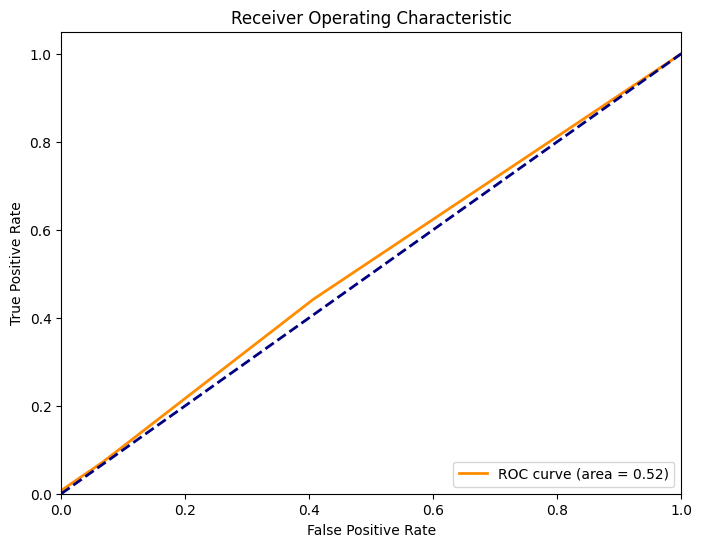

In [9]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()